In [1]:
import torch.utils
import torch.nn
import torch.nn.functional
import torch.optim
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True,
                       transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)


class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(784, 64)
        self.fc2 = torch.nn.Linear(64, 64)
        self.fc3 = torch.nn.Linear(64, 64)
        self.fc4 = torch.nn.Linear(64, 10)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.relu(self.fc3(x))
        return torch.nn.functional.log_softmax(self.fc4(x), dim=1)

0%|          | 0/9912422 [00:00<?, ?it/s]Downloading http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz to MNIST\raw\train-images-idx3-ubyte.gz
9920512it [00:00, 15050562.57it/s]
Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw
32768it [00:00, 468400.30it/s]
0it [00:00, ?it/s]Downloading http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz to MNIST\raw\train-labels-idx1-ubyte.gz
Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw
1654784it [00:00, 7054756.68it/s]
8192it [00:00, 157807.48it/s]
Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw
Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw
Processing...
Done!


In [2]:
model = Model()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(5):
    for data in trainset:
        x, y = data
        model.zero_grad()
        output = model(x.view(-1, 784))
        loss = torch.nn.functional.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0288, grad_fn=<NllLossBackward>)
tensor(0.7400, grad_fn=<NllLossBackward>)
tensor(0.2441, grad_fn=<NllLossBackward>)
tensor(0.0050, grad_fn=<NllLossBackward>)
tensor(0.0136, grad_fn=<NllLossBackward>)


In [3]:
counter = 0
total = 0
with torch.no_grad():
    for data in trainset:
        x, y = data
        output = model(x.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                counter += 1
            total += 1
print(counter / total)

0.9839166666666667


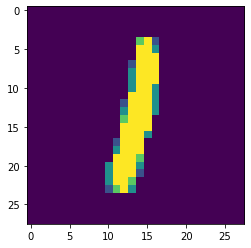

In [19]:
import matplotlib.pyplot
matplotlib.pyplot.imshow(x[9].view(28, 28))
matplotlib.pyplot.show()

In [18]:
print(torch.argmax(model(x[9].view(-1, 784))))

tensor(1)
